## sklearn의 KMeans 실습

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [7]:
n_samples = 1000
n_clusters = 3
random_state = 42

In [9]:
x_data, y_data = make_blobs(n_samples=n_samples,
                            n_features=2,
                            random_state=random_state,
                            centers=n_clusters)

In [10]:
x_data.shape

(1000, 2)

In [11]:
y_data.shape

(1000,)

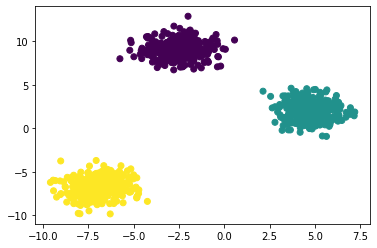

In [14]:
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)

In [15]:
kmeans = KMeans(n_clusters=n_clusters,
                n_init=10,
                random_state=random_state)

In [17]:
kmeans.fit(x_data)

KMeans(n_clusters=3, random_state=42)

In [20]:
kmeans.cluster_centers_

array([[-6.86656253, -6.78519427],
       [ 4.7286341 ,  2.05557266],
       [-2.52414179,  9.00394283]])

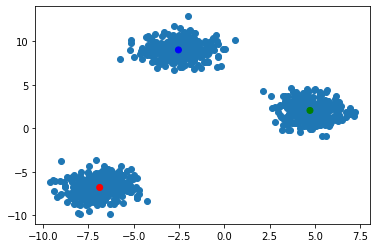

In [23]:
plt.scatter(x_data[:,0], x_data[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c = ['r', 'g', 'b'])

In [25]:
y_pred = kmeans.predict(x_data)

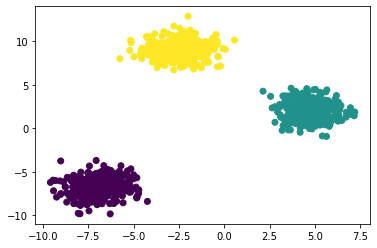

In [26]:
plt.scatter(x_data[:,0], x_data[:,1], c=y_pred)

---

## 이미지 손실을 줄이고 비슷한 색상끼리 묶는데 KMeans를 사용

In [27]:
from skimage import io
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [43]:
image = io.imread('bird_small.png')

In [44]:
image = image.astype('float64') / 255

In [46]:
w, h, d = image.shape

In [47]:
w, h, d

(128, 128, 3)

In [48]:
image_new = image.reshape((w * h, d))

In [49]:
image_new.shape

(16384, 3)

In [51]:
image_shuffled = shuffle(image_new,
                          random_state=random_state,
                          n_samples=1000)

In [53]:
kmeans = KMeans(n_clusters=64,
                random_state=random_state)

In [54]:
kmeans.fit(image_shuffled)

KMeans(n_clusters=64, random_state=42)

In [56]:
kmeans.cluster_centers_.shape

(64, 3)

In [57]:
labels = kmeans.predict(image_new)

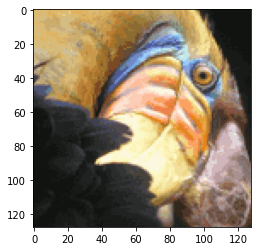

In [67]:
plt.imshow(kmeans.cluster_centers_[labels].reshape((w, h, d)))